<a href="https://colab.research.google.com/github/mohammad-amini-nasab/DataScience-practice/blob/main/Copy_of_assignment01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Datasets
The data is comprised of insurance costs for over 1,300 patients and includes information such as age, BMI, charges, etc.

### Source:
[https://www.kaggle.com/alimara/insurance-linear-regression](https://www.kaggle.com/alimara/insurance-linear-regression)

### Number of Cases(Records):
The dataset contains a total of 1338 cases.

### Features:
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/mohammad-amini-nasab/DataScience-practice/main/s1-e02/insurance.csv'

insurance = pd.read_csv(dataset_url)
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Information about data

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Preprocessing



### Converting categorical data to numeric data

In [ ]:
obj_df = insurance.select_dtypes(include=['object']).copy()
obj_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


Column *sex*: considering *female* is *0* and *male* is *1*.\
Column *smoker*: considering *no* is *0* and *yes* is *1*.
<!-- Column *region*: One Hot encoded. -->

In [ ]:
insurance['sex'].replace(['female', 'male'], [0, 1], inplace=True)
insurance['smoker'].replace(['no', 'yes'], [0, 1], inplace=True)

# insurance = pd.get_dummies(insurance, columns=['region'])
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

### Deal with null values

There is no null value.

In [ ]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Finding outliers

In [ ]:
# dropping Discrete data
data = insurance.drop(['sex', 'smoker', 'region'], axis=1)

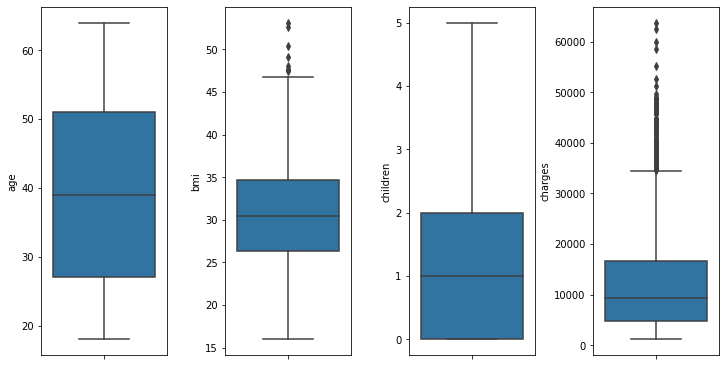

In [ ]:
# box and whisker plots
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(10, 5))
axs = axs.flatten()
for i, (k, v) in enumerate(data.items()):
  sns.boxplot(y=k, data=data, ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outliers percentage in every column.

In [ ]:
for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column bmi outliers = 0.67%
Column children outliers = 1.35%
Column charges outliers = 10.39%


Removing *charges* outliers.

In [ ]:
data = data[data['charges'] < 34000]

for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column bmi outliers = 1.01%
Column children outliers = 1.51%
Column charges outliers = 4.19%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

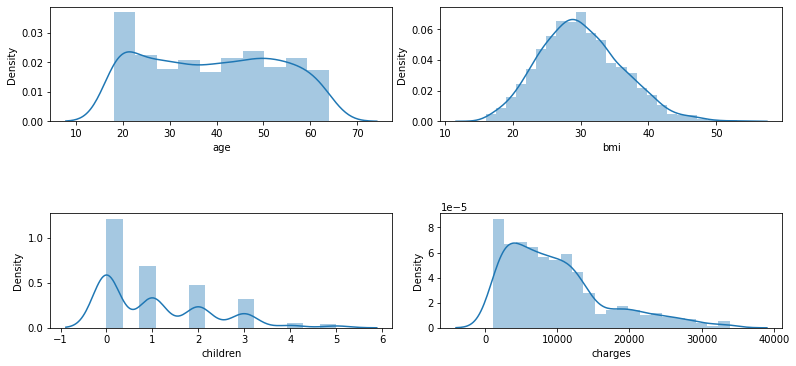

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(11, 5))
axs = axs.flatten()
for i, (k, v) in enumerate(data.items()):
  sns.distplot(v, ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)